<a href="https://colab.research.google.com/github/DODHIAMBOO/project_1/blob/main/CAR_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import OneHotEncoder
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#sns.set_style("darkgrid")
# MANUFACTURERS SUGGESTED RETAIL PRICE

In [52]:
df=pd.read_csv("/content/drive/MyDrive/data.csv")
df.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [53]:
df["Engine Fuel Type"].unique()

array(['premium unleaded (required)', 'regular unleaded',
       'premium unleaded (recommended)', 'flex-fuel (unleaded/E85)',
       'diesel', 'electric',
       'flex-fuel (premium unleaded recommended/E85)', 'natural gas',
       'flex-fuel (premium unleaded required/E85)',
       'flex-fuel (unleaded/natural gas)', nan], dtype=object)

In [54]:
df.corr()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
Year,1.000000,0.351794,-0.041479,0.263787,0.258240,0.198171,0.073049,0.227590
Engine HP,0.351794,1.000000,0.779988,-0.102713,-0.406563,-0.439371,0.037501,0.662008
Engine Cylinders,-0.041479,0.779988,1.000000,-0.140088,-0.621606,-0.600776,0.041145,0.531312
Number of Doors,0.263787,-0.102713,-0.140088,1.000000,0.118570,0.120881,-0.048272,-0.126635
highway MPG,0.258240,-0.406563,-0.621606,0.118570,1.000000,0.886829,-0.020991,-0.160043
city mpg,0.198171,-0.439371,-0.600776,0.120881,0.886829,1.000000,-0.003217,-0.157676
Popularity,0.073049,0.037501,0.041145,-0.048272,-0.020991,-0.003217,1.000000,-0.048476
MSRP,0.227590,0.662008,0.531312,-0.126635,-0.160043,-0.157676,-0.048476,1.000000


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [56]:
df.shape

(11914, 16)

BOXPLOT BEFORE DATA WAS CLEANED

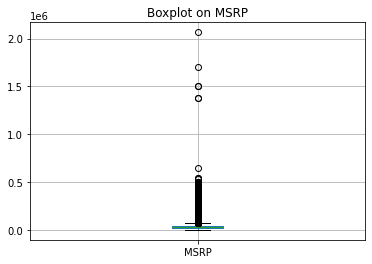

In [57]:
df[["MSRP"]].boxplot()
plt.title("Boxplot on MSRP")
plt.show()

HISTOGRAM BEFORE THE DATA WAS CLEANED

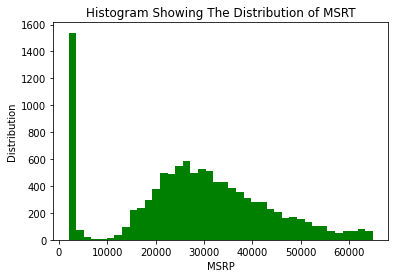

In [58]:

plt.hist(df[df['MSRP'] < 65000]['MSRP'], bins=40, color = 'g', alpha = 1)
plt.xlabel("MSRP")
plt.ylabel("Distribution")
plt.title("Histogram Showing The Distribution of MSRT")
plt.show()

In [59]:
df.isnull().sum()/len(df)

Make                 0.000000
Model                0.000000
Year                 0.000000
Engine Fuel Type     0.000252
Engine HP            0.005792
Engine Cylinders     0.002518
Transmission Type    0.000000
Driven_Wheels        0.000000
Number of Doors      0.000504
Market Category      0.314084
Vehicle Size         0.000000
Vehicle Style        0.000000
highway MPG          0.000000
city mpg             0.000000
Popularity           0.000000
MSRP                 0.000000
dtype: float64

In [60]:
df=df.dropna()

THE CODE REMOVES OUTLIERS FROM THE DATASET

In [61]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
df = df[~((df < (q1 - 1.5*iqr)) | (df > (q3 + 1.5*iqr))).any(axis=1)]

<ipython-input-61-e6b4c273e991>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (q1 - 1.5*iqr)) | (df > (q3 + 1.5*iqr))).any(axis=1)]


In [62]:
df['Market Category'].fillna(0)

0                  Factory Tuner,Luxury,High-Performance
1                                     Luxury,Performance
2                                Luxury,High-Performance
3                                     Luxury,Performance
4                                                 Luxury
5                                     Luxury,Performance
6                                     Luxury,Performance
7                                Luxury,High-Performance
8                                                 Luxury
9                                                 Luxury
10                               Luxury,High-Performance
11                                    Luxury,Performance
12                                    Luxury,Performance
13                                                Luxury
14                                    Luxury,Performance
15                               Luxury,High-Performance
16                               Luxury,High-Performance
32                             

In [63]:
df["MSRP"].median()

34995.0

In [64]:
df["MSRP"].mode()

0    29995
Name: MSRP, dtype: int64

In [65]:
df.isnull().sum()/len(df)

Make                 0.0
Model                0.0
Year                 0.0
Engine Fuel Type     0.0
Engine HP            0.0
Engine Cylinders     0.0
Transmission Type    0.0
Driven_Wheels        0.0
Number of Doors      0.0
Market Category      0.0
Vehicle Size         0.0
Vehicle Style        0.0
highway MPG          0.0
city mpg             0.0
Popularity           0.0
MSRP                 0.0
dtype: float64

In [66]:
df=df.drop_duplicates()

In [67]:
df.shape

(5598, 16)

HISTOGRAM AFTER THE DATA WAS CLEANED

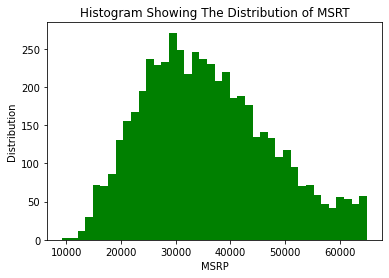

In [68]:
plt.hist(df[df['MSRP'] < 65000]['MSRP'], bins=40, color = 'g', alpha = 1)
plt.xlabel("MSRP")
plt.ylabel("Distribution")
plt.title("Histogram Showing The Distribution of MSRT")
plt.show()

BOXPLOT AFTER THE DATA WAS CLEANED

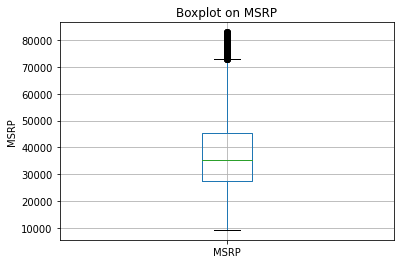

In [69]:
df[["MSRP"]].boxplot()
plt.ylabel("MSRP")
plt.title("Boxplot on MSRP")
plt.show()

RELATIONSHIP BETWEEN ENGINE HP AND MSRP

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


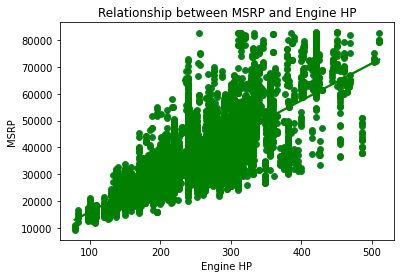

In [70]:
# THERE IS A LINEAR RELATIONSHIP BETWEEN ENGINE HP AND MSRP
df.plot.scatter('Engine HP','MSRP')
sns.regplot(x=df["Engine HP"],y=df["MSRP"],ci=None,color ='g')
plt.title("Relationship between MSRP and Engine HP")
plt.show()

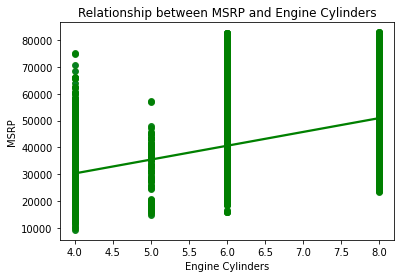

In [71]:
#It shows that there is a linear relationship between MSRP and ENGINE CYLINDERS
df.plot.scatter('Engine Cylinders','MSRP')
sns.regplot(x=df['Engine Cylinders'],y=df["MSRP"],ci=None,color ='g')
plt.title("Relationship between MSRP and Engine Cylinders")
plt.show()

BAR GRAPH ON ENGINE CYLINDERS AGAINST MSRP

Text(0, 0.5, 'MSRP')

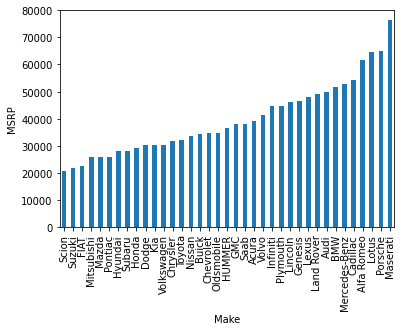

In [72]:
df.groupby("Make")["MSRP"].mean().sort_values(ascending = True).plot(kind = 'bar')
plt.ylabel("MSRP")

BAR GRAGH OF ENGINE FUEL TYPE AGAINST MSRP

Text(0.5, 0, 'MSRP')

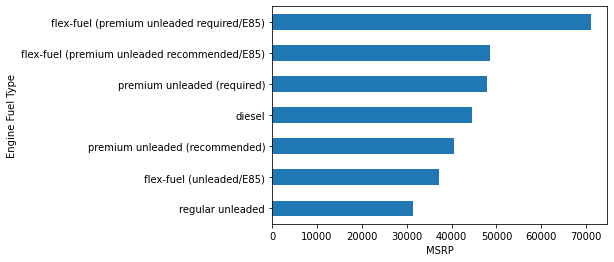

In [73]:
df.groupby("Engine Fuel Type")["MSRP"].mean().sort_values(ascending = True).plot(kind = 'barh')
plt.xlabel("MSRP")

BAR GRAPH OF ENGINE CYLINDERS AGAINST MSRP

Text(0.5, 0, 'MSRP')

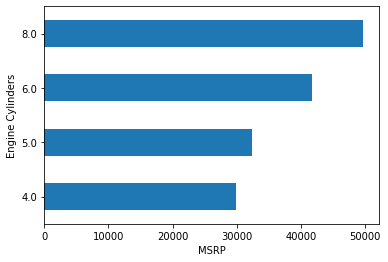

In [74]:
df.groupby("Engine Cylinders")["MSRP"].mean().sort_values(ascending = True).plot(kind = 'barh')
plt.xlabel("MSRP")

BAR GRAPH SHOWING POPULARITY AGAINST MSRP

Text(0.5, 0, 'MSRP')

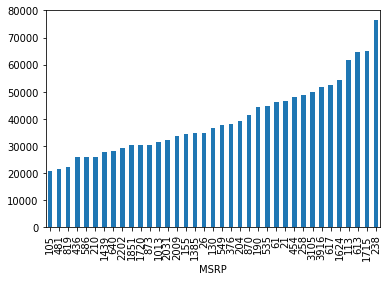

In [75]:
df.groupby("Popularity")["MSRP"].mean().sort_values(ascending = True).plot(kind = 'bar')
plt.xlabel("MSRP")

BAR GRAPH OF YEAR AGAINST MSRP

Text(0.5, 0, 'MSRP')

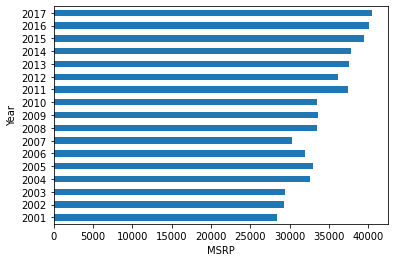

In [76]:
df.groupby("Year")["MSRP"].mean().plot(kind = 'barh')
plt.xlabel("MSRP")

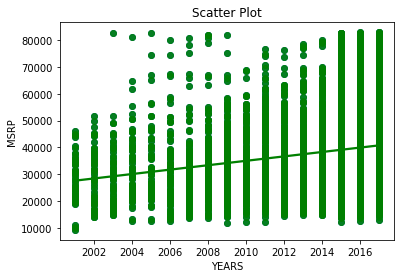

In [77]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()

ax.scatter(df['Year'], df['MSRP'])
sns.regplot(x=df['Year'],y=df["MSRP"],ci=None,color ='g')
ax.set_title('Scatter Plot')
ax.set_xlabel('YEARS')
ax.set_ylabel('MSRP')

plt.show()


In [82]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [84]:
X =df.drop('MSRP', axis=1)
y =df['MSRP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [85]:
X.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916


In [86]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [87]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [88]:
df.head(2)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650


ENCODING THE VARIABLES THAT ARE NON-NUMERIC

In [89]:
index=["Make","Model","Engine Fuel Type","Transmission Type","Market Category","Vehicle Size","Vehicle Style","Driven_Wheels"]
encoded_df=pd.get_dummies(df,columns=index)

In [90]:
X = encoded_df.drop(['MSRP'], axis = 1)
y = encoded_df['MSRP']

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 42)

In [93]:
from sklearn.linear_model import LinearRegression

# Create a LinearRegression object
reg = LinearRegression()

# Train the model on the training data
reg.fit(X_train, y_train)


LinearRegression()

In [94]:
# Make predictions on the testing data
y_pred = reg.predict(X_test)


In [95]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared value
r2 = r2_score(y_test, y_pred)

print('Mean squared error:', mse)
print('R-squared value:', r2)


Mean squared error: 10477525.521768171
R-squared value: 0.9453948341170197


In [97]:
import pandas as pd
import statsmodels.api as sm


# Add a constant to the predictor variable for the intercept term
X = sm.add_constant(X)

# Fit a linear regression model with OLS (ordinary least squares)
model = sm.OLS(y, X).fit()

# Print the summary statistics of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     484.5
Date:                Wed, 29 Mar 2023   Prob (F-statistic):           8.46e-83
Time:                        12:15:55   Log-Likelihood:                 17.437
No. Observations:                 150   AIC:                            -24.87
Df Residuals:                     145   BIC:                            -9.821
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1865      0.205      0.910      0.3

In [98]:
# Code for displaying the intercept of the regression line in a logistic regression model....
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

# Load iris dataset as an example
X, y = load_iris(return_X_y=True)

# Create a logistic regression object
clf = LogisticRegression(random_state=0).fit(X, y)

# Print the coefficients of the logistic regression model
#print(clf.coef_)

# Print the intercept of the logistic regression model
print(clf.intercept_)

#Print the predicted probabilities of the logistic regression model
#print(clf.predict_proba(X))


[  9.83920725   2.21460034 -12.05380759]


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


HYPERPARAMETER TUNING ON THE DATA TO IMPROVE ITS ACCURACY

In [99]:
#Code for improving the accuracy of my model of logistic regression....
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load iris dataset
iris = load_iris()

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Fit logistic regression model on the training set
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Predict class labels of the test set
y_pred = model.predict(X_test)

# Calculate accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0
